本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


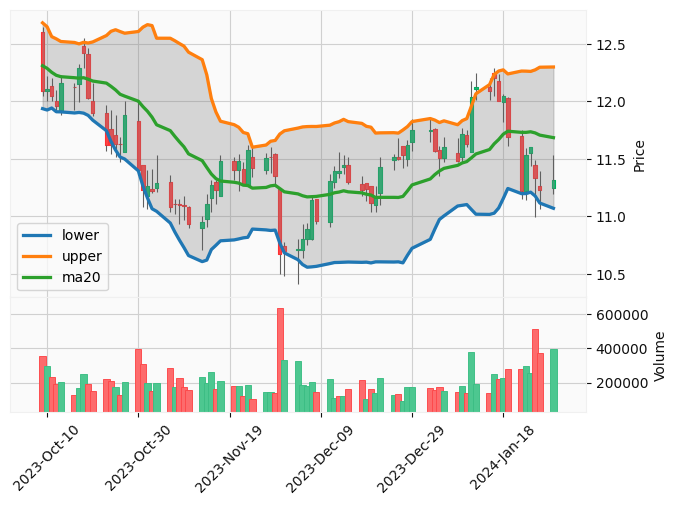

In [28]:
import mplfinance as mpf
import pandas as pd
import numpy as np
import tushare as ts
from datetime import datetime

df = ts.get_hist_data("601058", start="2023-09-01", end="2024-01-29").sort_values(by="date",ascending=True)
df.index = pd.to_datetime(df.index)

# 计算均线和布林带
df['upper'] = df['ma20'] + 2 * df['close'].rolling(window=20).std()
df['lower'] = df['ma20'] - 2 * df['close'].rolling(window=20).std()

df = df[df.index > datetime(year=2023, month=10, day=1)]

apdict = [mpf.make_addplot(df['lower'],label="lower"),
          mpf.make_addplot(df['upper'],label="upper"),
          mpf.make_addplot(df['ma20'],label="ma20")]

# 创建一个subplot，用于绘制蜡烛图
fig, axlist = mpf.plot(
    df, 
    type='candle',
    style="yahoo",
    volume=True,
    addplot=apdict,              # 增加格外的plot 比如我这里加了bollinger线
    show_nontrading=True,
    returnfig=True,
    fill_between=dict(y1=df['lower'].values,y2=df['upper'].values,alpha=0.3,color='grey') # 填充布林线 alpha应该是透明度
)

# 显示图表
mpf.show()